# Programming for Data Science and Artificial Intelligence

## 6. Classification

Classification is a supervised algorithm and is done when you have discrete y.  When y has two class, e.g., 0 or 1, we call Binary Classification.  Otherwise, we call Multi-class classification.

Let's first start with basic classification algorithm - Naive Bayes Classification.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.

Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution* as follows:

$$ f(x \mid \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

Imagine that you have the following data:

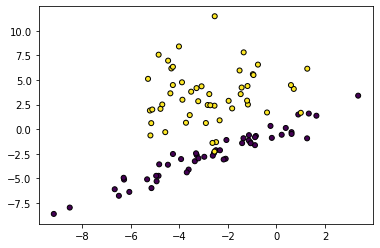

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, scale = 3,
                          random_state=30)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.  This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

Let's make some test data

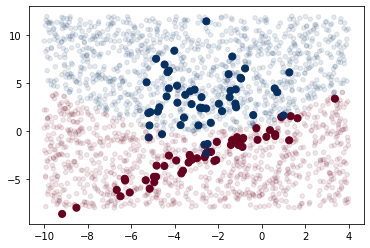

In [4]:
rng = np.random.RandomState(42)
#X1 and X2 coordinates, [X1, X2]
Xnew = [-10, -8] + [14, 20] * rng.rand(2000, 2)
pred = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=pred, s=20, cmap='RdBu', alpha=0.1)


We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [5]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.  , 1.  ],
       [0.91, 0.09],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.3 , 0.7 ],
       [0.65, 0.35],
       [0.98, 0.02]])

### Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
**The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.**

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

#### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [6]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [7]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is some example of data

In [8]:
print(train.data[0])
print("Target: ", train.target[0])  #start with 1, soc.religion.christian

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

Sklearn or any machine learning algorithms could not make sense of "String" data.  Thus if you encounter any string data, it has to be converted to numeric type, in order for the sklearn to make sense of it.

One simple way is to simply count them.  Here we can use TF-IDF vectorizer, which is equalvalent to CountVectorizer followed by TfidTransformer which transform a count matrix to a normalized count based on cutting less meaningful information like "the", "a", "is".  As you can guess, a term that appear across many documents are deem less meaningful.

#### TfidfTransformer

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]
transformer = TfidfTransformer()
transformer.fit_transform(counts).toarray()

array([[0.85151335, 0.        , 0.52433293],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.55422893, 0.83236428, 0.        ],
       [0.63035731, 0.        , 0.77630514]])

The formula is

$$ TF-IDF_{t} =  TF * IDF $$

where idf can be calculated as

$$ IDF(t) = log (\frac{n}{DF(t)}) + 1 $$

where n is the total number of document sin the document set,  DF(t) is the number of documents in the document set that contain term t.

Then finally, it is normalized by Euclidean norm:

$$ V_{norm} = \frac{v}{\sqrt{v_1^2 + v_2^2 + ....+v_n^2}} $$ 

For example, for first term (first column),

$$n = 6$$ 
$$TF = 3$$

and for the DF, it appears in 6 documents, thus 

$$DF(t)_{term1} = 6$$ 

thus 

$$ IDF(t)_{term1} = log (\frac{6}{6}) + 1 = 1$$

thus 

$$ TF-IDF_{term1} = TF * IDF = 3 * 1 = 3 $$

For term 3 (row1, col3), you will get $TF-IDF_{term3} = 1 * (log (\frac{6}{2}) + 1) = 2.0986$

To normalize, simply do 

$$ V_{norm} = \frac{[3, 0, 2.0986]}{\sqrt{3^2 + 0^2 + 2.0986^2}} = [0.8515, 0, 0.5243] $$ 



Now that you understand what is inverse term frequency which is commonly used on document analysis.  Let's build some pipeline and make predictions

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#transform our X to vectorized data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.data)
X_test = vectorizer.transform(test.data)
y_train = train.target
y_test = test.target

model = MultinomialNB()

In [11]:
model.fit(X_train, y_train)
pred = model.predict(X_test)  ##later for checking score

In [12]:
#fun thing you can do
some_string = "Programming is fun"
transformed = vectorizer.transform([some_string])
transformed.shape

prediction = model.predict(transformed)
print(train.target_names[prediction[0]])

comp.graphics


#### Classification metrics

##### Confusion matrix

Text(32.99999999999999, 0.5, 'predicted')

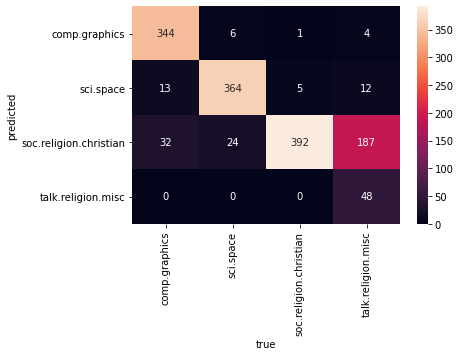

In [13]:
from sklearn.metrics import confusion_matrix
#we cannot plot this, so there are many possible metrics
#you can measure on classificaton
#I urge you to read https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

#use confusion matrix
mat = confusion_matrix(y_test, pred)

import seaborn as sns
sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')

Looking above, it seems the accuracy is quite ok, but religion talk was often confused with christianity talk which kinda make sense.

Fun part is we can reuse the model.predict to predict any text.

*Classificaton Report - precision, recall, f-score*

$$ Precision = TP / (TP + FP) $$

Precision is useful as metric when you want to prioritize removing False positive.  Example is Search engine in which you do not want to return any search results that are "false positive"

$$ Recall = TP / (TP + FN) $$

Recall is useful as metric when you want to prioritize removing False negative.  Example is cancer detection in which you do not want to miss detecting any real positive (i.e., False negative).

$$ F1 = 2 x \frac{Precision * Recall}{Precision+Recall} $$

F1 is simply seeking a balance between Precision and Recall.  Also F1 is good metric when there is an uneven class distribution (large number of actual negatives)

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

Accuracy is mostly avoided, unless your model is really balanced of both positives and negatives

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=train.target_names))

                        precision    recall  f1-score   support

         comp.graphics       0.97      0.88      0.92       389
             sci.space       0.92      0.92      0.92       394
soc.religion.christian       0.62      0.98      0.76       398
    talk.religion.misc       1.00      0.19      0.32       251

              accuracy                           0.80      1432
             macro avg       0.88      0.75      0.73      1432
          weighted avg       0.86      0.80      0.77      1432



Common thing we do is to plot the precision_recall_curve

##### ROC curve

An ROC curve shows the performance of one classification model at **all classification thresholds**. 

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis, where

$$ TPR = TP / (TP + FN) $$

$$ FPR = FP / (FP + TN) $$

This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

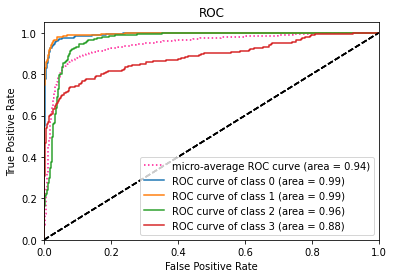

In [15]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

#to use roc curve, we have to convert our problems into binary

#change y
y_test = label_binarize(test.target, classes=[0, 1, 2, 3])

#change model as binary classifier
model = OneVsRestClassifier(MultinomialNB())

model.fit(X_train, train.target)
y_score = model.predict_proba(X_test)

n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    #threshold will be determined by y_score and will
    #be tried by the roc_curve
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot micro average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':')

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"ROC curve of class {i} (area = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="best")

##### Becareful about ROC curve

The Receiver Operating Characteristic (ROC) curves plot FPR vs. TPR as shown above. Because TPR only depends on positives, ROC curves do not measure the effects of negatives. The area under the ROC curve (AUC) assesses overall classification performance. AUC does not place more emphasis on one class over the other, so it does not reflect the minority class well.

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [16]:
#checking the balance of the data
print(len(train.target[train.target==0]))
print(len(train.target[train.target==1]))
print(len(train.target[train.target==2]))
print(len(train.target[train.target==3]))

584
593
599
377


##### Precision-Recall Curve

Davis and Goadrich in this paper (https://ftp.cs.wisc.edu/machine-learning/shavlik-group/davis.icml06.pdf) propose that Precision-Recall (PR) curves will be more informative than ROC when dealing with highly skewed datasets. The PR curves plot precision vs. recall. Because Precision is directly influenced by class imbalance so the Precision-recall curves are better to highlight differences between models for highly imbalanced data sets. When you compare different models with imbalanced settings, the area under the Precision-Recall curve will be more sensitive than the area under the ROC curve.


Example of drawback of ROC curve

- $TPR = TP / (TP + FN) $
- $FPR = FP / (FP + TN) $

======balanced data=====
- n_sample = 500
- pos = 250
- neg = 250
- Given the following confusion matrix

<code>
			Actual
			  +	     -
Predict.+     125     125
        -     0       250
</code>

- $TPR = 125 / (125 + 0) = 1$
- $FPR = 125 / 125 + 250 = 0.3$

Looks ok!

=====imbalanced data=======
- n_sample = 500
- pos = 30
- neg = 470
- Given the following confusion matrix

<code>
			Actual
			  +	     -
Predict.+     15     15
        -     0      470
</code>

- $TPR = 15 / (15 + 0)$ = 1
- $FPR = 15/ (15 + 470) {\approx} 0$

Perfect model??  How?  Because the amount of wrong positives is undermined by the great amount of negatives

====Precision-Recall curve works much better for imbalanced=====

- Precision =  TP / (TP + FP)
- Recall = TP / (TP + FN)

- Precision = 15 / (15 + 15) = 0.5. #minimize false positive
- Recall = 15 / (15 + 0) = 1.   #minimize false negative

Reflect much better!

Average precision score, micro-averaged over all classes: 0.86


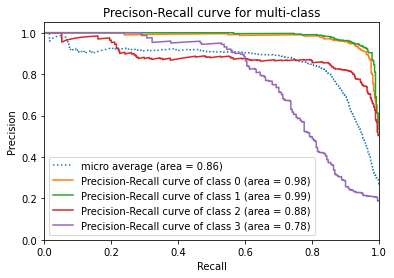

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


def plot_pr_curve(y_test, y_score):
    # Compute Precision-Recall curve and area for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        #threshold will be determined by y_score and will
        #be tried by the roc_curve
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])


    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
        y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_score,
                                                         average="micro")    


    #AP = sigma(n) (recall_{n} - recall_{n-1}) * P_{n}
    #Average precision gives you average precision at all 
    #such possible thresholds, which is also similar to the area 
    #under the precision-recall curve.
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    # Plot the micro average
    plt.plot(recall["micro"], precision["micro"], ":",
            label=f"micro average (area = {average_precision['micro']:.2f})")

    '''
    Micro- and macro-averages (for whatever metric) will compute slightly different things, 
    and thus their interpretation differs. A macro-average will compute the metric independently 
    for each class and then take the average (hence treating all classes equally), whereas a micro-average 
    will aggregate the contributions of all classes to compute the average metric. In a multi-class 
    classification setup, micro-average is preferable if you suspect there might be class imbalance 
    (i.e you may have many more examples of one class than of other classes).

    Macro-averages is simply mean of all recall and precision,
    but micro-averages is the recall/precision of each class divided
    by each class FP or FN, thus micro average is more robust
    to imbalanced data

    '''

    # Plot of a precision-recall curve for a specific class
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], label=f"Precision-Recall curve of class {i} (area = {average_precision[i]:.2f})")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precison-Recall curve for multi-class')
    plt.legend(loc="best")
    
plot_pr_curve(y_test, y_score)

### When to Use Naive Bayes

Usually only as baseline!  Because naive Bayesian classifiers make such stringent assumptions about data, they will **generally NOT perform as well as a more complicated model.**
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

Naive Bayes classifiers tend to perform well only when your data is clearly separable or has high dimension.

The reason for high dimension is because new dimensions usually add more information, thus data become more separable.  Thus, if you have really large dataset, try Naive Bayes and it may surprise you!

### Other classification models

### Logistic Regression

Logistic regression is named for the function used at the core of the method, the logistic function. In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values. Logistic Regression is used when response variable is categorical in nature.

The logistic function, also called the sigmoid function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$ f(x) = \frac{1}{1+e^{-x}} $$

Where e is the base of the natural logarithms and value is the actual numerical value that you want to transform. E is a really convenient number for math, for example Whenever you take the derivative of e^x (that's e to the x), you get e^x back again.  It's the only function on Earth that will do that.

Logistic regression uses an equation as the representation, similar to linear regression. The central premise of Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a linear(read: straight) boundary. Your data must be linearly seperable in n dimensions:

#### Sigmoid function

Text(0, 0.5, 'y')

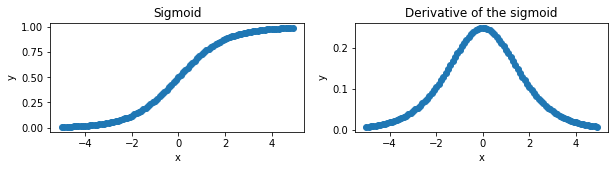

In [18]:
# Formula:
# g(x) = 1 / (1 + np.exp(-x))

# lambda way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

# Function way
def sigmoid(x, deriv = False):
    sig = 1 / (1 + np.exp(-x))
    if deriv:
        sig_deriv = sig*(1-sig) 
        return sig_deriv
    else:
        return sig
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, deriv = True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of the sigmoid')
ax2.set_xlabel('x')
ax2.set_ylabel('y')


So if we had the following function

$$ y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} $$

Given some point ($x_{1}$,$x_{2}$), if we plugged it in, the equation could output a positive result (for one class), negative result (for the other class), or 0 (the point lies right on the decision boundary).

So  we have a function that outputs a value in (-infinity, +infinity) given an input data point. But how do we map this to the probability P that goes from [0, 1]? The answer, is that we need a "activation" function or a mapper function.

For example, given the following X and weights, compute y

In [19]:
X = np.array([-4,-3,0,4,5,6]).reshape(-1,1)
w = np.array([1]).reshape(1,1)
print("Dot product: ", X @ w)
print("Sigmoid: ", sigmoid(X @ w))

Dot product:  [[-4]
 [-3]
 [ 0]
 [ 4]
 [ 5]
 [ 6]]
Sigmoid:  [[0.01798621]
 [0.04742587]
 [0.5       ]
 [0.98201379]
 [0.99330715]
 [0.99752738]]


#### Tangent function

The range of the tanh function is from (-1 to 1), unlike sigmoid where the range is 0 to 1.  Thus in tanh function, the decision boundary is at 0, unlike sigmoid which is at 0.5.  The formula is as simple as:

$$ f(x) = tanh(x) $$ 

which is equal to 

$$ f(x) = \frac{sinh x}{cosh x} $$

which is equal to

$$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$


In [20]:
# Generator
tanh_gen = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Function
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [21]:
print("Tanh: ", tanh(X @ w))

Tanh:  [[-0.9993293 ]
 [-0.99505475]
 [ 0.        ]
 [ 0.9993293 ]
 [ 0.9999092 ]
 [ 0.99998771]]


#### ReLU function

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.  The formula is super simple as follows:

$$ f(x) = max(0, x) $$

In [22]:
# Generator 
relu_gen = lambda x: x if x > 0 else 0

# Function
def relu(x, deriv = False):
    if deriv == True:
        x_relu = []
        for each in x:
            if each <= 0:
                x_relu.append(0)
            else:
                x_relu.append(1)  #derivative of x is 1
        return x_relu #np.ones_like(x)
    else:            
        return np.maximum(0, x) 

In [23]:
print("Relu: ", relu(X @ w))

Relu:  [[0]
 [0]
 [0]
 [4]
 [5]
 [6]]


#### Leaky Relu
As you can guess, leaky Relu got chooped from all the negative, thsu all negative values are lost.  Instead, we can implement a simple scalar to replace 0, so the negative values remain there.  The function is simple as follows:

$$ f(x) = \alpha * x $$

In [24]:
# Function
def lrelu(x, alpha = 0.9, deriv = False):
    if deriv == True:
        x_relu = []
        for each in x:
            if each <= 0:
                x_relu.append(0)
            else:
                x_relu.append(alpha)
        return x_relu #np.ones_like(x)
    else:            
        return np.maximum(alpha, alpha*x) 

In [25]:
print("lrelu: ", lrelu(X @ w))

lrelu:  [[0.9]
 [0.9]
 [0.9]
 [3.6]
 [4.5]
 [5.4]]


#### Cost function of Logistic regression

The cost/loss function is basically simple as this:

$$ cost function = \left\{
    \begin{array}{l}
      -log(f(x))       \mbox{if $y = 1$}\\
      \mbox{if $y = 0$}
    \end{array}
  \right. $$
  
which is basically 

- if y = 1 (positive), cost should be 0 if f(x) = 1, whereas if f(x) is approaching 0, cost should be approaching infinity, e.g., -log(1) = 0; -log(0) = infinity

- if y = 0 (negative), cost should be 0 if f(x) = 0, whereas if f(x) is approaching 1, cost should be approaching infinity, e.g., -log(1-0) = 0; -log(1 - 1) = infinity

We can combine them into one cost function like this:

$$ cost function = -\frac{1}{m} \sum_{i=1}^{m} [y * log(f(x)) - (1-y)log(1-f(x))] $$

where m is number of samples.  When we want to use descent algorithms, the derivative is as follows:

$$ derivative = \frac{1}{m} X^T [f(x) - y] $$

I will leave it until here, so you can implement logistic regression from scratch on your own.

Average precision score, micro-averaged over all classes: 0.94


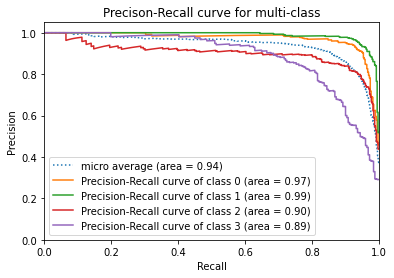

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="ovr")

model.fit(X_train, train.target)
y_score = model.predict_proba(X_test)

#plot precision recall curve
plot_pr_curve(y_test, y_score)

#### When to Use Logistic Regression

Almost always, as a baseline though!  Logistic Regression make an assumption based on linearity and as long as your data is approximately linear, Logistic Regression work fantastic.  There are also some clear advantages:
- They are quite fast for both training and prediction
- They have very few (if any) tunable parameters
- Descent algorithms works well with Logistic Regression

The only problem of Logistic Regression lies on its limitation of linearity.  I would usually try Naive Bayesian, followed by Logistic Regression as baseline.  And if the accuracy is quite low, I would try other non-linear classification models such as SVM or KNN or Decision Tree.

### Support Vector Machine

SVM is a **binary classification** algorithm, often called the "widest street" algorithm to try to draw the best-fit line that maximize the margin between two classes.

Let's say we have this following data:

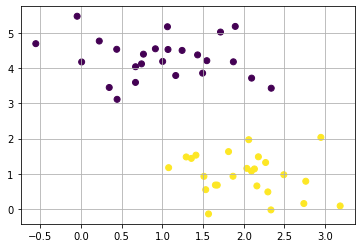

In [27]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

In simple algorithms, we can draw a line separating them like this:

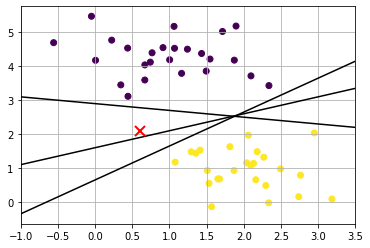

In [28]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#where should this value be classified as?
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

You can probably already imagine the idea.  It is basically draw around each line a margin of some width, up to the nearest point of each class.  If this width is maximized for a particular line, that line should probably be the best.

(-1.0, 3.5)

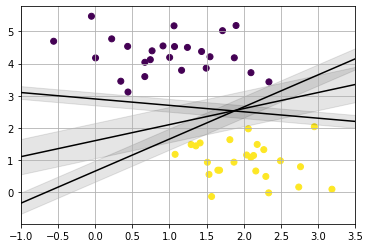

In [29]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d,
                     color='black', alpha=0.1)

plt.xlim(-1, 3.5)

#### Calculating errors

Fortunately, just like linear regression or logistic regression, we can define a loss function that is convex, and thus we can use descent algorithms to find the answer.  The loss function is as follows:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))= 
\begin{cases}
    0,& \text{if } y*f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function 

As we defined the loss function, we can now define the objective function for the svm:

$$\underset{w}{min}\ \lambda\parallel w\parallel^2 + \ \sum_{i=1}^n\big(1-y_i \langle x_i,w \rangle\big)_+$$

As you can see, our objective of a svm consists of two terms. The first term is a regularizer, the second term the loss. The regularizer balances between margin maximization and loss. To get more informations I advice you the tutorial introduction of the above adviced Schölkopf & Smola book.

#### Derivatives

To minimize this function, we need the gradients of this function.

As we have two terms, we will derive them seperately using the sum rule in differentiation.

$$
\frac{\delta}{\delta w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k
$$

$$
\frac{\delta}{\delta w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,& \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              & \text{else}
\end{cases}
$$

This means, if we have a misclassified sample $x_i$, respectively $y_i \langle x_i,w \rangle \ < \ 1$, we update the weight vector w using the gradients of both terms, if $y_i \langle x_i,w \rangle \geq 1$ we just update w by the gradient of the regularizer. To sum it up, our stochastic gradient descent for the svm looks like this:

if $y_i⟨x_i,w⟩ < 1$:
$$
w = w + \eta (y_ix_i - 2\lambda w)
$$
else:
$$
w = w + \eta (-2\lambda w)
$$

I will stop here.  Hopefully you will enjoy implementing this in your homework!

The best parameters are {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'} witha score of 0.96
Average precision score, micro-averaged over all classes: 0.95


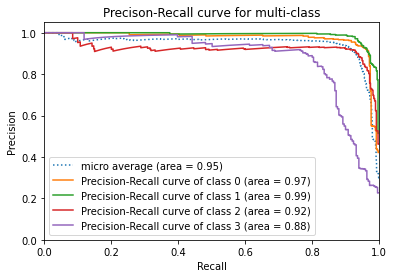

In [30]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

#this code will run very long time!!!

#select the type of hyperplane used to separate the data
kernel = ['linear', 'rbf', 'poly']

#regularized penalty
#when C is small, classifier is ok with misclassified data
#when C is large, classifier is heavily penalized for misclassified data
C_range = [1, 5, 10, 50]

#parameter for RBF kernel, increasing gamma
#allows for more complex decision boundary but can lead
#to overfitting
gamma_range = [0.0001, 0.0005, 0.001, 0.005]

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, train.target)

print(f"The best parameters are {grid.best_params_} with" +
          f"a score of {grid.best_score_:.2f}")

model = grid.best_estimator_

model.fit(X_train, train.target)
y_score = model.decision_function(X_test) #svm use this instead

#plot precision recall curve
plot_pr_curve(y_test, y_score)

#### When to Use SVM

SVM work fantastic, given the following advantages:
- Kernel trick allows non-linearity and works well with high-dimensional data
- Supports regularization out of the box
- Use only few support vectors as decision boundary thus the prediction phase is very fast.  

However, SVMs have several disadvantages as well:
- For large number of training amples, the computational cost can be scary! Around $\mathcal{O}[N^3]$ at worst
- Require fine-tuning C which often takes a lot of time! 
- Does not support probability - only output the class

We usually use SVM when our Baye or Logistic fellows fail us, or we believe our data is non-linear to some extent.

### Random Forests

Random forests are an example of an *ensemble* method, meaning that it relies on aggregating the results of an ensemble of simpler estimators.
The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting!

Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_0021.png)

#### How is a Decision Tree fit?

* How does the algorithm choose which variables to include on the tree?
* How does the algorithm choose where variables should be located on the tree?
* How does the algorithm choose when to stop the tree?

**Key idea is that we want to choose the feature that has the lowest "impurity" to split our tree, thus our tree can reach the decision as fast as possible with smallest height possible**

One way to measure impurity is using **Gini index** (another one is entropy but which measure very similar thing) with the following formula:

$$ I_{G} = 1 - \sum_{i=1}^{c} p_{i}^{2} $$

where $c$ is number of classes, and $p_{i}$ is the probability of each class.  For example, let's say our X is <code>[[2],[3],[10],[19]]</code> and y is <code>[0, 0, 1, 1]</code>.  In a more simpler version, if a node has 4 samples, and 2 samples are of class cancer, and 2 samples are of no cancer, then the gini index of this node is

$$p_{cancer}=(2/4)^2 = 0.25$$ and $$p_{no-cancer}=(2/4)^2 = 0.25$$   

Thus the gini index of this node is

$$ I_{G} = 1 - (0.25 + 0.25) = 0.5 $$

Then we need to decide how to best split this node so we can get the lowest gini (highest purity) children.

For example, if we split this sample with **x1 < 3**: we will get left node X as <code>[[2]]</code> and y as <code>[0]</code> and the right node X as <code>[[3],[10],[19]]</code> and y as <code>[0, 1, 1]</code>.  The weighted gini of the children are 

$$ 1/4*I_{leftG} + 3/4 * I_{rightG} =  $$
$$ 1/4 * (1 - (1/1)^2) + 3/4 * (1 - (1/3)^2 - (2/3)^2) = 0.33 $$

Hmm...but we know we can split better, right?  Let's try **x1 < 4**: we will get left node X as <code>[[2],[3]]</code> and y as <code>[0, 0]</code> and the right node X as <code>[[10],[19]]</code> and y as <code>[1, 1]</code>.  If you do the math right, the gini is 0!

$$ 2/4 * (1 - (2/2)^2) + 2/4 * (1 - (2/2)^2 ) = 0 $$

Thus, in conclusion, we can say that spliting **x1<4** is a much better split than **x1<3**.  However, to really find the best split, it is an exhaustive and greedy algorithm, in which we have to iterate and check every value on each feature as a candidate split, find the gini index.  

#### How do we find all threshold for continuous values?

We can sort all features.  Then we are identify critical value using the midpoint between all consecutive values.  For example, given X is <code>[[2],[3],[10],[19]]</code>, the critical value to compare is 2.5, 6.5 and 14.5.

The code can be implemented in several ways.  Example are shown below:

In [78]:
#Credit: https://github.com/joachimvalente/decision-tree-cart/blob/master/cart.py
#Edited to make it more readable and precise for students
"""
Idea is simple.  Simply loop through all possible threshold:
2.5, 6.5, 14.5.  

2.5 threshold will give 
[0]         [0, 1, 1]
6.5 threshold will give
[0, 0]      [1, 1]
14.5 threshold will give
[0, 0, 1]   [1]

Then we simply calculate the best gini.

This approach work best if we first sort
our sample to be in order, since we will have fast way
to tell what are the feature value used to split that particular 
way.

"""
def find_split(X, y, n_classes):
    """ Find split where children has lowest impurity possible
    in condition where the purity should also be less than the parent,
    if not, stop.
    """
    n_samples, n_features = X.shape
    
    #so it will not have any warning about "referenced before assignments"
    feature_ix, threshold = None, None

    # Count of each class in the current node.
    sample_per_class_parent = [np.sum(y == c) for c in range(n_classes)]

    # Gini of parent node.
    best_gini = 1.0 - sum((n / n_samples) ** 2 for n in sample_per_class_parent)

    # Loop through all features.
    for feature in range(n_features):
        
        # Sort data along selected feature.
        sample_sorted = sorted(X[:, feature])
        y_sorted = sorted(y)
        
        sample_per_class_left = [0] * n_classes        
        sample_per_class_right = sample_per_class_parent.copy()
        
        # loop through each threshold, 2.5, 6.5, 14.5
        for i in range(1, n_samples): 
            #the class of that sample
            c = y_sorted[i - 1]
            
            #put the sample to the left
            #how come we know?
            #because we have sorted our sample!
            sample_per_class_left[c] += 1
            
            #take the sample out from the right
            sample_per_class_right[c] -= 1
            
            gini_left = 1.0 - sum(
                (sample_per_class_left[x] / i) ** 2 for x in range(n_classes)
            )
                        
            #we divided by n_samples - i since we know that the left amount of samples
            #since left side has already i samples
            gini_right = 1.0 - sum(
                (sample_per_class_right[x] / (n_samples - i)) ** 2 for x in range(n_classes)
            )

            #weighted gini
            weighted_gini = ((i / n_samples) * gini_left) + ( (n_samples - i) /n_samples) * gini_right

            # in case the value are the same, we do not split
            # (both have to end up on the same side of a split).
            if sample_sorted[i] == sample_sorted[i - 1]:
                continue

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                feature_ix = feature
                threshold = (sample_sorted[i] + sample_sorted[i - 1]) / 2  # midpoint

    #return the feature number and threshold 
    #used to find best split
    return feature_ix, threshold

X = np.array([[2],[3],[10],[19]])
y = np.array([0, 0, 1, 1])
feature, threshold = find_split(X, y, len(set(y)))

#will print 0, 6.5
print("Best feature used for split: ", feature)
print("Best threshold used for split: ", threshold)

Best feature used for split:  0
Best threshold used for split:  6.5


One all value are exhausted, we can then use the best decision note as our split node.  Then when we go to the next node, we have to repeat again.  This algorithm is called **CART (Classification and Regression Trees)** algorithm, where the recursion keeps on going until certain stop criteria, such as maximum tree depth is reached, or no split can produce two children with lower purity.

#### Overview of the algorithm

1. Calculate the purity of the data
2. Select a candidate split
3. Calculate the purity of the data after the split
4. Repeat for all variables
5. Choose the variable with the lowest impurity 
6. Repeat for each split until some stop criteria is met

Example could be stop criteria could be max tree depth, or minimum node records.

Here are some snippets of the possible implementation 
of Decision Tree

In [79]:
#To help with our implementation, we create a class Node
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

Let's try implement Decision Tree to see how it looks

In [80]:
def fit(Xtrain, ytrain, n_classes, max_depth=3, depth=0):
    n_samples, n_features = Xtrain.shape
    num_samples_per_class = [np.sum(ytrain == c) for c in range(n_classes)]
    #predicted class using the majority of sample class
    predicted_class = np.argmax(num_samples_per_class)
    
    #define the parent node
    node = Node(
        gini = 1 - sum((np.sum(y == c) / n_samples) ** 2 for c in range(n_classes)),
        predicted_class=predicted_class,
        num_samples = ytrain.size,
        num_samples_per_class = num_samples_per_class,
        )
        
    #perform recursion
    if depth < max_depth:
        feature, threshold = find_split(Xtrain, ytrain, n_classes)
        if feature is not None:
            #take all the indices that is less than threshold
            indices_left = X[:, feature] < threshold
            X_left, y_left = X[indices_left], y[indices_left]
            
            #tilde for negation
            X_right, y_right = X[~indices_left], y[~indices_left]
            
            #take note for later decision
            node.feature_index = feature
            node.threshold = threshold
            node.left = fit(X_left, y_left, max_depth, depth+1)
            node.right = fit(X_right, y_right, max_depth, depth+1)
    return node

#to predict, it is as simple as moving 
#through the tree 
def predict(sample, tree):
    while tree.left:
        if sample[tree.feature_index] < tree.threshold:
            tree = tree.left
        else:
            tree = tree.right
    return tree.predicted_class

#fit starting with tree depth = 0
#make the name so that it won't overlap with our news data
Xtrain = np.array([[2, 5],[3, 5],[10, 5],[19, 5]])
ytrain = np.array([0, 0, 1, 1])
Xtest = np.array(([[4, 6],[6, 9],[9, 2],[12, 8]]))
ytest = np.array([0, 0, 1, 1])

tree = fit(Xtrain, ytrain, n_classes=len(set(ytrain)), max_depth=3, depth=0,)
pred = [predict(x, tree) for x in Xtest]

print("Tree feature ind: ", tree.feature_index)
print("Tree threshold: ", tree.threshold)
print("Pred: ", np.array(pred))
print("ytest: ", ytest)

Tree feature ind:  0
Tree threshold:  6.5
Pred:  [0 0 1 1]
ytest:  [0 0 1 1]


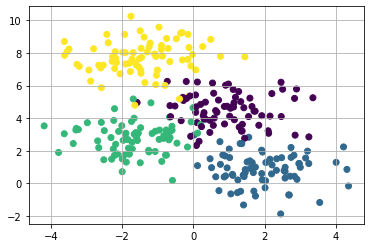

In [34]:
#let's consider the following 2D data with 4 classes
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y);

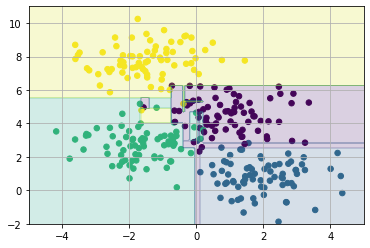

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X, y)

def plot_tree(model, X, y):
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)

    xx, yy = np.meshgrid(np.linspace(-5, 5, num=200),
                             np.linspace(-2, 11, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(set(y))
    contours = plt.contourf(xx, yy, Z, alpha=0.2)
    
plot_tree(model, X, y)

#### Decision Trees and overfitting

Over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

However, by using information from multiple decision trees training on subset of data (i.e., random forests), we might expect better results

#### Ensembles

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator, as shown here:

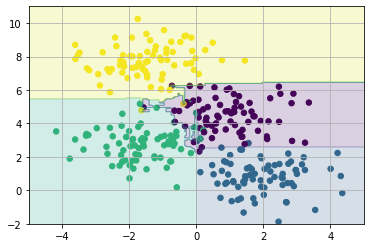

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()

#let each tree train a random subset of 80% of data (called bootstraping)
#randomness will help in make sure the final vote is fairly distributed
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
plot_tree(bag, X, y)

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 10}


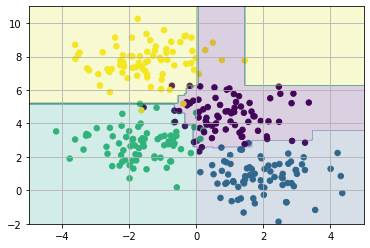

In [37]:
#this is the same as RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [10, 50, 100], 
              "criterion": ["gini", "entropy"],
              "max_depth": np.arange(1, 10)}
model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid)
grid.fit(X, y)

print(grid.best_params_)

model = grid.best_estimator_
model.fit(X, y)

plot_tree(model, X, y)

The best parameters are {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100} witha score of 0.77
Average precision score, micro-averaged over all classes: 0.82


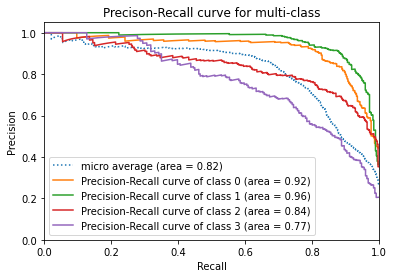

In [38]:
#### Apply random forests to our news data

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(model, param_grid=param_grid, cv=cv)
grid.fit(X_train, train.target)

print(f"The best parameters are {grid.best_params_} with" +
          f"a score of {grid.best_score_:.2f}")

model = grid.best_estimator_

model.fit(X_train, train.target)
y_score = model.predict_proba(X_test)

#plot precision recall curve
plot_pr_curve(y_test, y_score)

#### When to use Random Forests
Random forests has several advantages:
- Voting helps overcome overfitting
- Sklearn implements <code>feature_importances_</code> in <code>RandomForestClassifier</code> which helps you understand which feature is useful for classification in Random Forest
- Just like other ensemble, it works well with structured/tabular data.  Indeed, XGBoost (another ensemble method) is among the best classifier for structured/tabular data and often used for Kaggle competition But if we are working with lots of "confusing" features, we will go for deep learning, such as image, sound, brain signal analysis. 
- Unlike Decision Trees, multiple trees give out probability

Two biggest disadvantages are:
- Difficult to interpret what is going on
- Does not work well with rare outcome since boostraping will not hit the data

In conclusion, if you are working with structured/tabular data, and would like high accuracy but does not care much about interpretability (just like most Kaggle competition does), you may want to use ensemble methods (including Random Forests and the like)

### K-nearest neighbors

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

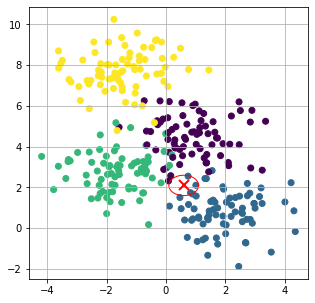

In [39]:
import matplotlib.pyplot as plt

xfit = np.linspace(-1, 3.5)

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt

ax.grid()
ax.scatter(X[:, 0], X[:, 1], c=y)

#where should this value be classified as?
ax.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

#let's say roughly 5 neighbors
circle = plt.Circle((0.6, 2.1), 0.5, color='red', fill=False)
ax.add_artist(circle)

The best parameters are {'n_neighbors': 3} witha score of 0.90
Average precision score, micro-averaged over all classes: 0.83


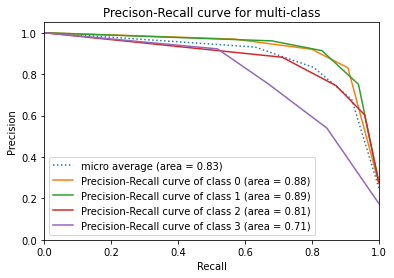

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(2, 10)}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(model, param_grid=param_grid, cv=cv)
grid.fit(X_train, train.target)

print(f"The best parameters are {grid.best_params_} with" +
          f"a score of {grid.best_score_:.2f}")

model = grid.best_estimator_

model.fit(X_train, train.target)
y_score = model.predict_proba(X_test)

#plot precision recall curve
plot_pr_curve(y_test, y_score)

#### When to use KNN
I guess the only good thing about it is that KNN is super easy to implement, and generally work quite well on simple classification problems.  However, it also comes with a price:

- Computational expense as feature grows, since it requires computing the distance for each feature, where for each feature, we have to compute the input points with every single points, then perform sort (which can be expensive), and then get the majority class from the nearest nth-neighbors.  Very expensive!
- Can't work with categorical features since it is difficult to formulate distance formulas for categorial features
- Of course, it takes even more time to find the right n_neighbors (or commonly known as k)